In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [13]:
# Load historical stock price data
data = pd.read_csv('AAPL.csv')  # Replace 'AAPL.csv' with your dataset
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [3]:
# Extract the 'Close' prices for prediction
data = data[['Close']]
data = data.values

In [4]:
# Normalize the data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [5]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

In [6]:
# Function to create sequences and labels for training
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 10  # Adjust the sequence length as needed
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)


In [7]:
# Build an LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [9]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
5/5 [==============================] - 8s 24ms/step - loss: 0.1055
Epoch 2/50
5/5 [==============================] - 0s 22ms/step - loss: 0.0306
Epoch 3/50
5/5 [==============================] - 0s 22ms/step - loss: 0.0186
Epoch 4/50
5/5 [==============================] - 0s 21ms/step - loss: 0.0160
Epoch 5/50
5/5 [==============================] - 0s 22ms/step - loss: 0.0104
Epoch 6/50
5/5 [==============================] - 0s 22ms/step - loss: 0.0124
Epoch 7/50
5/5 [==============================] - 0s 21ms/step - loss: 0.0100
Epoch 8/50
5/5 [==============================] - 0s 21ms/step - loss: 0.0094
Epoch 9/50
5/5 [==============================] - 0s 22ms/step - loss: 0.0093
Epoch 10/50
5/5 [==============================] - 0s 21ms/step - loss: 0.0078
Epoch 11/50
5/5 [==============================] - 0s 21ms/step - loss: 0.0077
Epoch 12/50
5/5 [==============================] - 0s 21ms/step - loss: 0.0074
Epoch 13/50
5/5 [==============================] - 0s 21ms/st

In [10]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')


1/1 [==============================] - 2s 2s/step - loss: 0.0075
Test Loss: 0.007535424083471298


In [11]:
# Make predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

1/1 [==============================] - 2s 2s/step


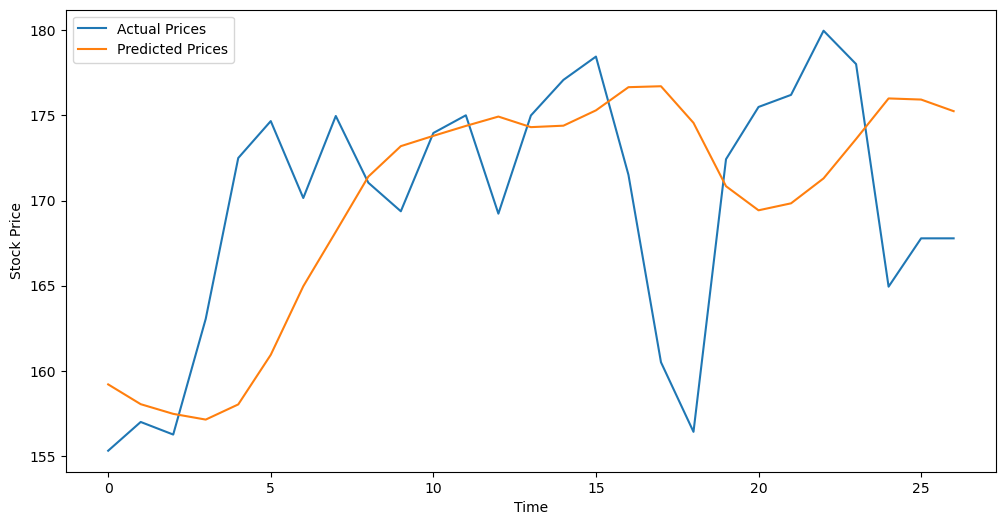

In [12]:
# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), scaler.inverse_transform(y_test), label='Actual Prices')
plt.plot(range(len(y_test)), predicted_prices, label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()